In [1]:
import pandas as pd
import numpy as np
import random


In [2]:
dish_df = pd.read_csv("Dish.csv")
dish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422039 entries, 0 to 422038
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              422039 non-null  int64  
 1   name            422039 non-null  object 
 2   description     0 non-null       float64
 3   menus_appeared  422039 non-null  int64  
 4   times_appeared  422039 non-null  int64  
 5   first_appeared  422039 non-null  int64  
 6   last_appeared   422039 non-null  int64  
 7   lowest_price    392939 non-null  float64
 8   highest_price   392939 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 29.0+ MB


In [6]:
dishes_list = dish_df["name"].tolist()

In [8]:
dishes_list[10]

'Striped bass saute, meuniere'

In [16]:
data = []

In [17]:

for x in range(200):
    rand_dishes_length = random.randint(50, 75) 
    random_dish_list = random.choices(dishes_list, k = rand_dishes_length)
    data.append([x,' '.join(map(str, random_dish_list))])

In [18]:
resto_df = pd.DataFrame(data, columns = ['resto_id', 'dishes']) 

In [21]:
resto_df.to_csv("resto_df.csv")

In [2]:
resto_df = pd.read_csv("resto_df.csv")

In [3]:
resto_df.shape

(200, 3)

In [4]:
resto_df.head()

,Unnamed: 0,resto_id,dishes
0,0,0,Mirabelle Leon Beyer Masthuhnbrust Singapur in...
1,1,1,Piel Bro's. Lager Scrambled Eggs and Onions FL...
2,2,2,"3 fried eggs and ham or bacon, bread With Pota..."
3,3,3,Braised free range chicken fresh polenta Beef ...
4,4,4,Spring duckling Cream or Country Gravy Oyster ...


## Normalizing the dishes

In [5]:
resto_df["dishes"] = resto_df["dishes"].str.lower()

In [6]:
resto_df.head()

,Unnamed: 0,resto_id,dishes
0,0,0,mirabelle leon beyer masthuhnbrust singapur in...
1,1,1,piel bro's. lager scrambled eggs and onions fl...
2,2,2,"3 fried eggs and ham or bacon, bread with pota..."
3,3,3,braised free range chicken fresh polenta beef ...
4,4,4,spring duckling cream or country gravy oyster ...


In [7]:
import nltk

In [8]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
resto_df["dishes"] = resto_df["dishes"].map(lambda x: nltk.word_tokenize(x))

In [10]:
porter = nltk.PorterStemmer()

In [11]:
lancaster = nltk.LancasterStemmer()

In [12]:
wnl = nltk.WordNetLemmatizer()

In [13]:
resto_df["dishes"] = resto_df["dishes"].map(lambda x: [porter.stem(t) for t in x])

In [14]:
resto_df.head()

,Unnamed: 0,resto_id,dishes
0,0,0,"[mirabel, leon, beyer, masthuhnbrust, singapur..."
1,1,1,"[piel, bro, 's, ., lager, scrambl, egg, and, o..."
2,2,2,"[3, fri, egg, and, ham, or, bacon, ,, bread, w..."
3,3,3,"[brais, free, rang, chicken, fresh, polenta, b..."
4,4,4,"[spring, duckl, cream, or, countri, gravi, oys..."


In [15]:
resto_df["dishes"] = resto_df["dishes"].map(lambda x: ' '.join(map(str, x)))

In [16]:
resto_df.head()

,Unnamed: 0,resto_id,dishes
0,0,0,mirabel leon beyer masthuhnbrust singapur in c...
1,1,1,piel bro 's . lager scrambl egg and onion flam...
2,2,2,"3 fri egg and ham or bacon , bread with potato..."
3,3,3,brais free rang chicken fresh polenta beef gou...
4,4,4,spring duckl cream or countri gravi oyster or ...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

In [44]:
tf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tf.fit_transform(resto_df['dishes'])

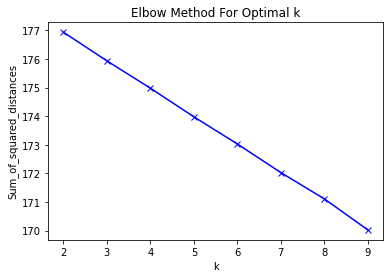

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(tfidf_matrix)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
true_k = 5
title = resto_df["resto_id"]
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(tfidf_matrix)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

     title  cluster
30      30        0
104    104        0
96      96        0
113    113        0
14      14        0
..     ...      ...
100    100        4
114    114        4
135    135        4
69      69        4
99      99        4

[200 rows x 2 columns]


Cluster: 0
Titles
  14
  30
  96
 104
 113


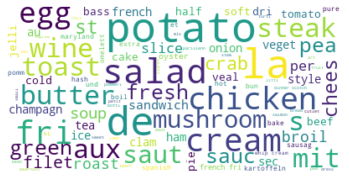

Cluster: 1
Titles
   3
   8
  15
  16
  17
  20
  24
  40
  41
  54
  60
  61
  62
  63
  70
  72
  77
  78
  83
  84
  85
  87
  93
  95
  97
 105
 109
 115
 119
 120
 122
 123
 124
 126
 132
 134
 139
 140
 146
 147
 155
 159
 161
 162
 165
 178
 182
 185


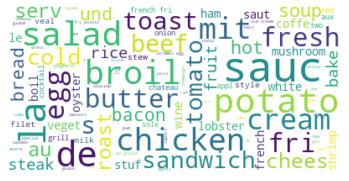

Cluster: 2
Titles
   4
   5
   7
   9
  10
  11
  12
  13
  18
  19
  22
  26
  27
  28
  31
  34
  36
  38
  39
  42
  44
  51
  52
  56
  57
  58
  66
  67
  68
  75
  76
  79
  81
  86
  89
  90
  91
  98
 101
 102
 110
 111
 116
 118
 121
 125
 127
 128
 129
 130
 131
 133
 136
 137
 138
 141
 142
 144
 148
 150
 152
 153
 154
 156
 158
 160
 167
 168
 169
 172
 174
 176
 177
 180
 181
 184
 190
 193
 194
 196
 198
 199


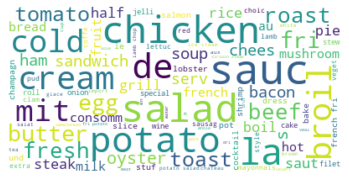

Cluster: 3
Titles
   1
  25
  32
  33
  37
  43
  46
  47
  48
  49
  55
  59
  64
  65
  71
  74
  82
 103
 106
 107
 108
 112
 117
 143
 145
 149
 151
 157
 163
 166
 170
 171
 173
 179
 183
 186
 189
 191
 192
 197


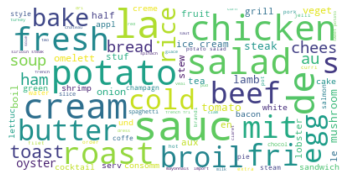

Cluster: 4
Titles
   0
   2
   6
  21
  23
  29
  35
  45
  50
  53
  69
  73
  80
  88
  92
  94
  99
 100
 114
 135
 164
 175
 187
 188
 195


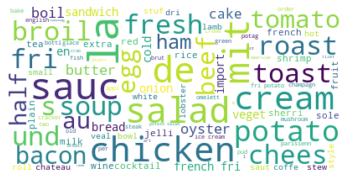

In [66]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':resto_df["dishes"]}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [45]:
tfidf_matrix.shape

(200, 8770)

In [46]:
X_dbscan = tfidf_matrix.todense()

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,min_samples=10).fit(X_dbscan)

In [53]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_ 

In [54]:
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

In [55]:
import matplotlib.pyplot as plt 

['y', 'b', 'g', 'r']


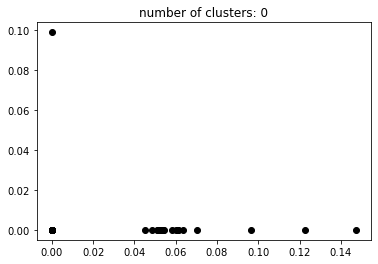

In [56]:
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X_dbscan[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X_dbscan[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

In [218]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) 
results = {}
for idx, row in resto_df.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
   similar_items = [(cosine_similarities[idx][i], resto_df['resto_id'][i]) for i in similar_indices] 
   results[row['resto_id']] = similar_items[1:]

In [219]:
def item(id):  
  return resto_df.loc[resto_df['resto_id'] == id]['resto_id'].tolist()[0]


In [220]:
def recommend(item_id, num):
    print("Recommending " + str(num) + " restaurants similar to " + str(item(item_id)) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + str(item(rec[1])) + " (score:" + str(rec[0]) + ")")

In [221]:
recommend(item_id=61, num=5)

Recommending 5 restaurants similar to 61...
-------
Recommended: 30 (score:0.20605073511349403)
Recommended: 13 (score:0.1780949470546816)
Recommended: 103 (score:0.1576493403959465)
Recommended: 98 (score:0.15302255047819316)
Recommended: 169 (score:0.14960471234632747)
